# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Segmentación de Clientes
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1TlILFEVGZHessjmKkUMWL4NHlZ0DcHQb)

![alt text](https://drive.google.com/uc?id=1KaI1zjhARTFAs6X6VwqdsYZecd5EYDMw)

![alt text](https://drive.google.com/uc?id=1Q46sKROZf7jqKus0TfL7agQ5ZnzECiws)

![alt text](https://drive.google.com/uc?id=1zJX7y-J2jhIL17Lh7OroOZvrlblI0u1s)

![alt text](https://drive.google.com/uc?id=1L03HfNPXpLdLlKHk_I6FIj_ahPCuPL0S)

![alt text](https://drive.google.com/uc?id=1i-OPyUph2PGuuZ5FtN0hGX3BkEXCAQNM)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [63]:
# Incluye el link al archivo CSV donde has almacenado tu dataset

# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [64]:
creditcard_df = pd.read_csv("Marketing_data.csv")
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [65]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [66]:

# El balance medio es $1564 
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

In [67]:
# Vamos a investigar quien ha hecho una compra de $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] > 40761]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [68]:
# Vamos a ver quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta
creditcard_df[creditcard_df['CASH_ADVANCE'] > 47137]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TAREA #3: VISUALIZACIÓN DEL DATASET

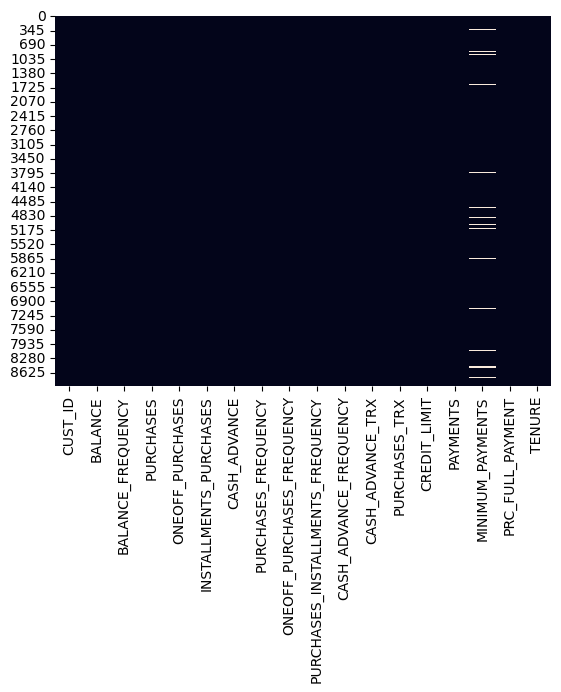

In [69]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
# plot missing values
sns.heatmap(creditcard_df.isnull(), cbar=False)
plt.show()

In [70]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [71]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
creditcard_df['MINIMUM_PAYMENTS'] = imputer.fit_transform(creditcard_df['MINIMUM_PAYMENTS'].values.reshape(-1,1))

In [72]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
creditcard_df['CREDIT_LIMIT'] = imputer.fit_transform(creditcard_df['CREDIT_LIMIT'].values.reshape(-1,1))

In [73]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
creditcard_df.duplicated().sum()

0

In [74]:
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada 
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [75]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

In [76]:
# sns.pairplot(creditcard_df)
# Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'

In [77]:
# 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'

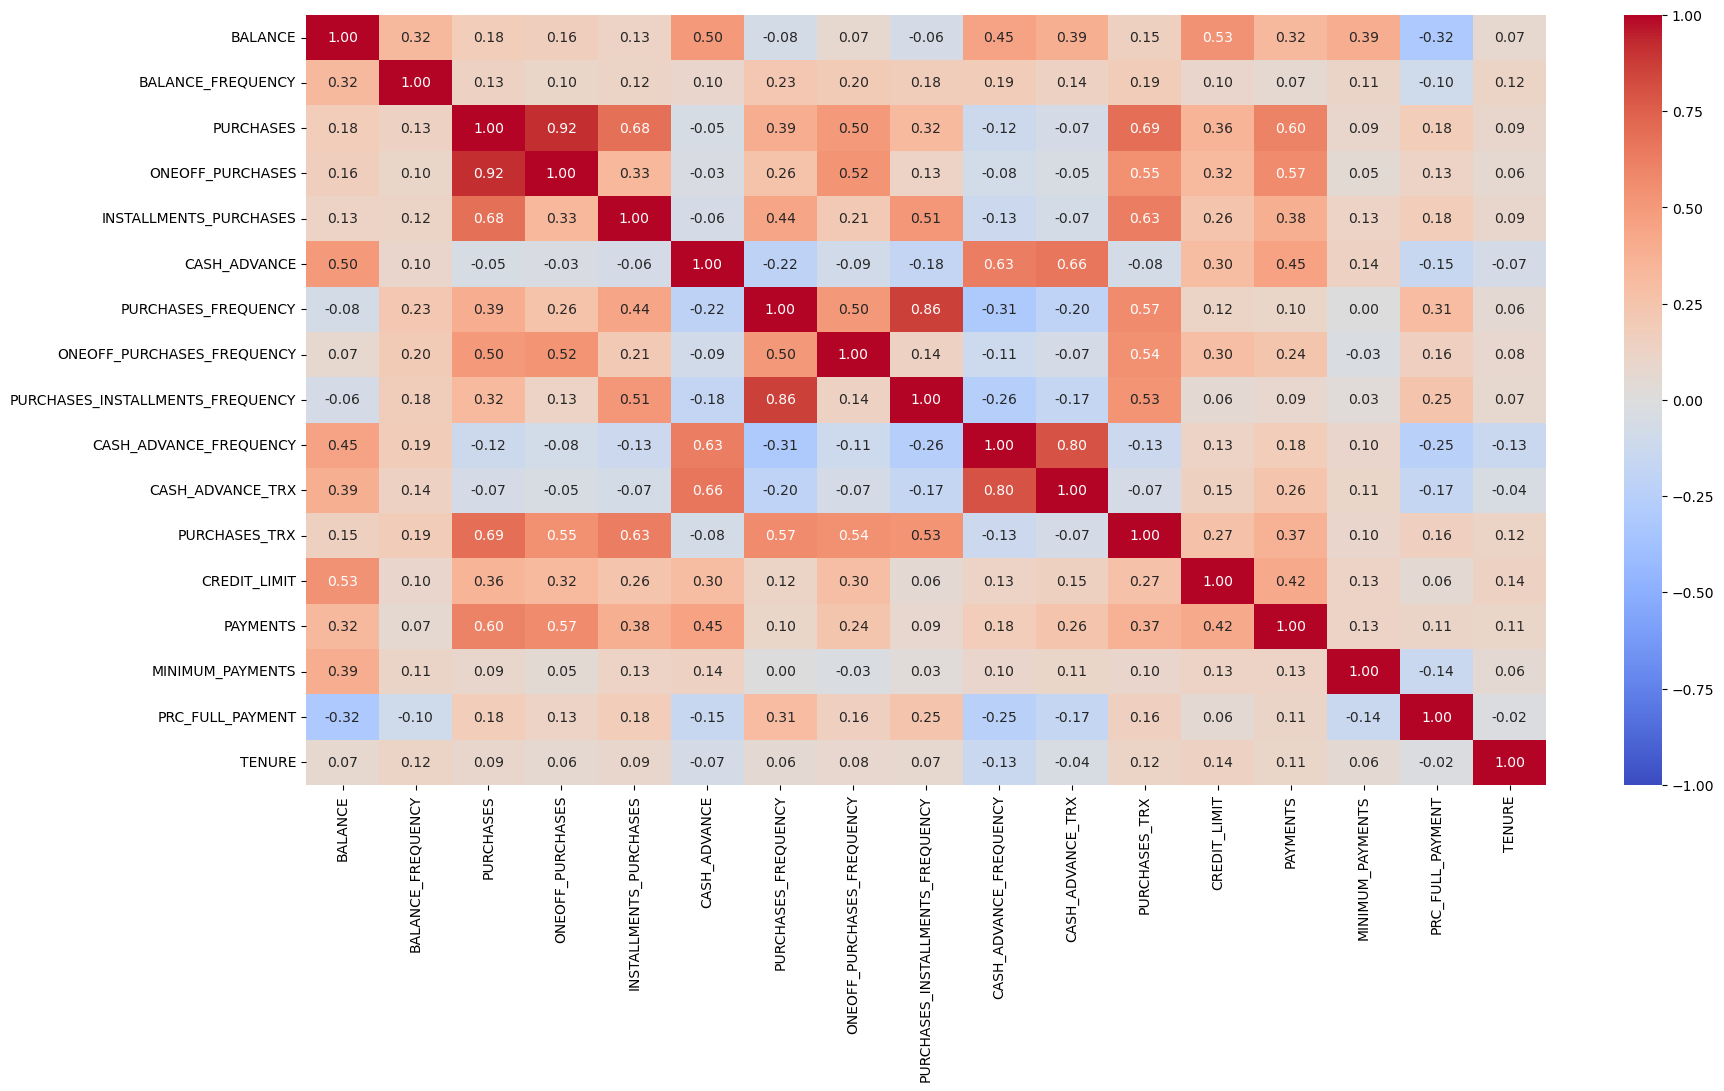

In [78]:
# plot heatmap with correlation
plt.figure(figsize=(20,10))
sns.heatmap(creditcard_df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

# TAREA #4: ENTENDER LA TEORÍA DETRÁS DE K-MEANS

![alt text](https://drive.google.com/uc?id=1T2vAOTCInx9l2S9b9H5xm-__h-RLRY5s)

![alt text](https://drive.google.com/uc?id=1eXSerp2FQpxhAa355hKeVT0-tY94ixsw)

![alt text](https://drive.google.com/uc?id=1D12cmll79HCx_Xbt3PSq51PnytJ7DhSr)

![alt text](https://drive.google.com/uc?id=1Syuco6pZ410oP6KbfgCH18s09eB4Hd2H)

![alt text](https://drive.google.com/uc?id=1DQ4KUV66YG-xnZ4xorQFgtkx5EbE2GLI)

![alt text](https://drive.google.com/uc?id=1LzWnRt2w1bLUBGJ7tRK-b4Xudbx54H3D)

![alt text](https://drive.google.com/uc?id=1orzdGxbZPiWlLZcI7EKHAmhnz7T41cV_)

![alt text](https://drive.google.com/uc?id=1ITLmp2XTCUFIM-BPpDWOYmfjxENxywer)

# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLISTERS UTILIZANDO EL MÉTODO DEL CODO

In [79]:
# Empecemos por escalar primero el dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

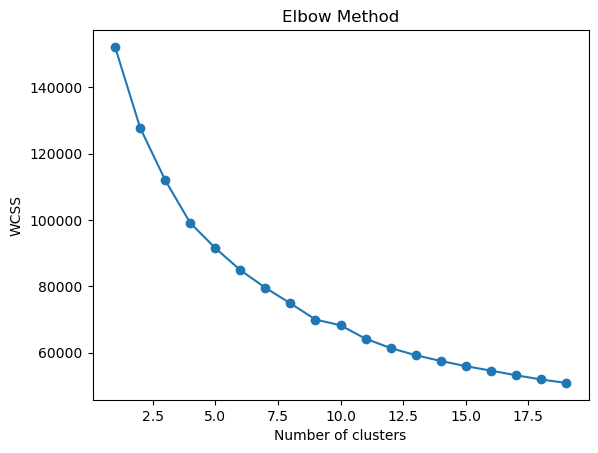

In [80]:
from sklearn.cluster import KMeans

# apply elbow methd to find the optimal number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(creditcard_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [81]:
# # Vamos a probar con 7 clusters
# kmeans = KMeans(n_clusters=7, random_state=0)

# # Entrenamos el modelo
# kmeans.fit(creditcard_df_scaled)

# # Vamos a añadir las etiquetas de los clusters al dataset
# creditcard_df['cluster'] = kmeans.predict(creditcard_df_scaled)

# # Vamos a ver la distribución de los clusters
# sns.countplot(x='cluster', data=creditcard_df)
# plt.show()

In [82]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.

centroid_info = pd.DataFrame(
    kmeans.cluster_centers_, # you can also use scaler.inverse_transform(kmeans.cluster_centers_)
    columns=creditcard_df.columns
)
centroid_info
# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.224740,0.362112,-0.412242,-0.295382,-0.432102,0.553417,-1.022625,-0.504590,-0.847851,1.318026,0.875417,-0.530706,-0.204434,-0.018026,-0.022652,-0.407308,0.206998
1,-0.334038,0.335879,-0.112246,-0.250123,0.194242,-0.387568,0.925015,-0.392714,1.136601,-0.492532,-0.376887,0.116232,-0.405838,-0.275883,-0.043188,-0.321245,0.305307
2,1.146383,0.486480,3.285704,2.958213,2.332919,-0.223401,1.157477,2.015726,1.136888,-0.329951,-0.215753,3.611430,1.460065,1.774226,0.372600,0.441841,0.325515
3,0.394320,0.451784,1.057403,0.696437,1.221029,-0.303799,1.178062,1.287756,1.294727,-0.407227,-0.325269,1.600267,0.743265,0.455917,0.058309,-0.275462,0.332716
4,-0.725585,-1.566947,-0.244292,-0.220449,-0.172879,-0.410796,-0.292887,-0.367597,-0.261562,-0.599637,-0.425644,-0.343545,-0.067203,-0.182623,-0.311299,2.142015,0.158485
5,-0.136078,0.396413,-0.361627,-0.247936,-0.399555,-0.267790,-0.867921,-0.420397,-0.756794,-0.232369,-0.258811,-0.492626,-0.387775,-0.310243,-0.082734,-0.457769,0.279605
6,-0.592757,-0.048003,-0.208787,-0.271851,0.006723,-0.329482,0.983091,-0.341933,0.924950,-0.326351,-0.318029,-0.190314,-0.719069,-0.436639,-0.255189,0.663902,-3.159382
7,1.245128,0.425627,-0.276177,-0.192838,-0.298891,2.280416,-0.595802,-0.190335,-0.559030,3.275078,4.349414,-0.295663,0.666982,0.820618,0.283891,-0.319931,-0.102799
8,2.401359,0.430987,-0.319231,-0.225659,-0.340201,1.469619,-0.769235,-0.393764,-0.663682,1.038417,0.697910,-0.454099,1.522604,0.388291,0.603182,-0.492847,0.160495
9,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004964,-0.129901,11.641856,-0.525551,0.298409


# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

![alt text](https://drive.google.com/uc?id=17b_4GsvzJmWt9cnPOcgSGmEelagGSbtL)

In [83]:
# Obtenemos las componentes principales
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [84]:
# Creamos un dataframe con las dos componentes 

principalComponents = pca.fit_transform(creditcard_df_scaled)

# TAREA #8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1kY4Ol3OvDd4IaFdrGXB8s-vAa1bhsT6V)

![alt text](https://drive.google.com/uc?id=1qtSiLgN_ZYWV_SPD79xpiapkbHxNmqvb)

![alt text](https://drive.google.com/uc?id=13sf_hXzpb2_bctB5EF7w-pXDV_72J95_)

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

In [85]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape = (creditcard_df.shape[1], ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [86]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [87]:
autoencoder.fit(
    creditcard_df, creditcard_df, 
    batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 18ms/step - loss: 1720072.2500
Epoch 2/25
70/70 [==============================] - 1s 18ms/step - loss: 619223.9375
Epoch 3/25
70/70 [==============================] - 1s 19ms/step - loss: 335908.9062
Epoch 4/25
70/70 [==============================] - 1s 19ms/step - loss: 254586.5625
Epoch 5/25
70/70 [==============================] - 1s 19ms/step - loss: 184266.0625
Epoch 6/25
70/70 [==============================] - 1s 19ms/step - loss: 150233.8594
Epoch 7/25
70/70 [==============================] - 1s 19ms/step - loss: 121534.8984
Epoch 8/25
70/70 [==============================] - 1s 19ms/step - loss: 106897.8984
Epoch 9/25
70/70 [==============================] - 1s 20ms/step - loss: 98588.0547
Epoch 10/25
70/70 [==============================] - 1s 20ms/step - loss: 92696.3047
Epoch 11/25
70/70 [==============================] - 1s 19ms/step - loss: 75984.7578
Epoch 12/25
70/70 [==============================] - 1s 19ms/step

In [98]:
autoencoder.save_weights('autoencoder.h5')
pred = autoencoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 3ms/step


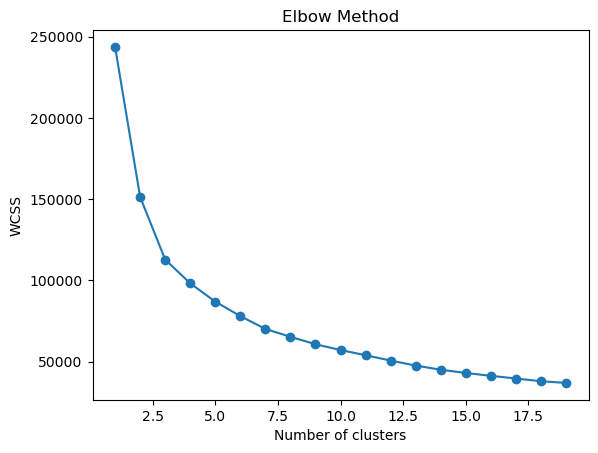

In [99]:
# elbow method kmeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pred)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,12.074700,0.090538,1.543978,-0.567284,2.192224,5.057194,-0.157398,-0.059726,0.182917,-0.152659,0.061468,0.284829,13.227333,1.296443,6.113390,-0.179969,0.295517
1,13.223818,-0.022702,1.846599,-0.542060,2.404036,9.868448,-0.319507,0.002759,0.193781,-0.025160,-0.006296,0.227375,14.332473,1.913123,7.852293,-0.177731,0.320219
2,9.582205,0.075653,2.041828,-0.316916,2.381312,4.345380,-0.199977,-0.045110,0.122881,-0.140008,0.008795,0.304303,11.697516,0.298731,4.170412,-0.122190,0.309405
3,13.250378,0.108389,1.388031,-0.625607,2.107309,5.606487,-0.162697,-0.056238,0.228173,-0.162035,0.058021,0.268096,14.314115,1.431783,7.040414,-0.179908,0.274586
4,12.593374,0.049451,2.129130,-0.667684,2.818235,5.208984,-0.187716,-0.016382,0.223614,-0.184296,0.056084,0.321080,13.396245,2.016977,7.451442,-0.207223,0.378829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,13.303941,0.119005,1.303151,-0.605071,2.013501,5.562040,-0.144831,-0.063651,0.214676,-0.154095,0.062485,0.265244,14.462460,1.352931,6.840910,-0.175994,0.263226
8946,12.725258,0.110349,1.344190,-0.594946,2.045871,5.617211,-0.154290,-0.058875,0.199805,-0.136005,0.054952,0.259527,13.955448,1.167115,6.483202,-0.176140,0.260278
8947,13.195019,0.117719,1.309065,-0.603804,2.018359,5.572193,-0.146124,-0.063240,0.211791,-0.150329,0.061214,0.263808,14.369231,1.315790,6.771972,-0.176521,0.262226
8948,12.271894,0.130910,0.928339,-0.409472,1.430876,7.376969,-0.149628,-0.085875,0.171501,-0.070840,-0.040179,0.257013,14.594976,0.241777,5.674192,-0.092881,0.216160


In [102]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,0.104022,-1.706945
1,4.165844,0.552660
2,-3.194200,-0.715084
3,1.912686,-1.877850
4,0.911989,-2.415614


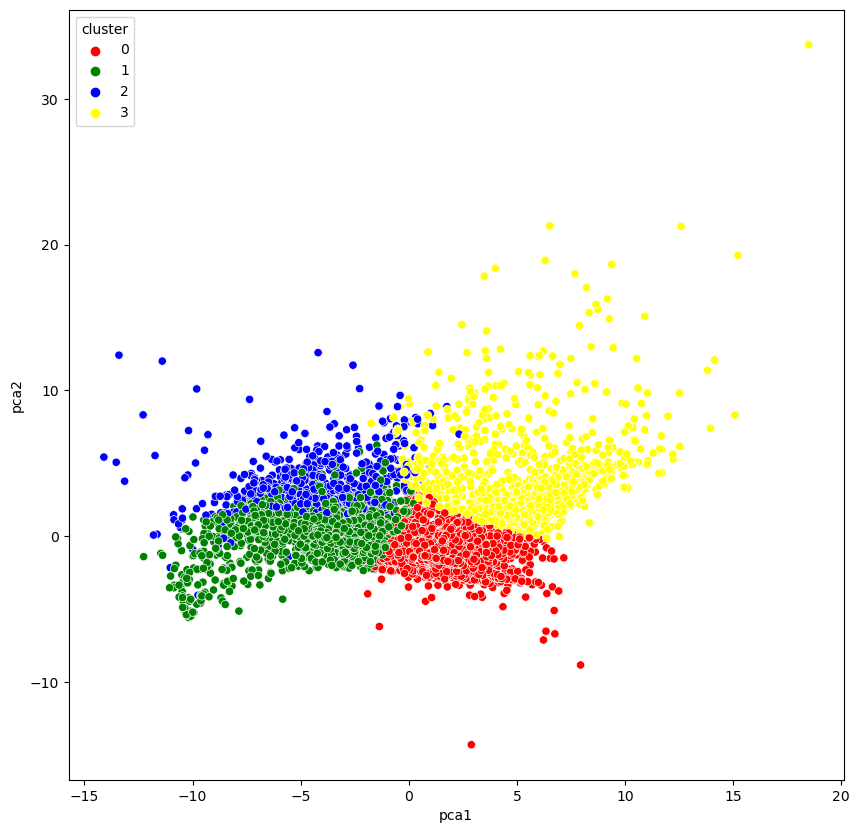

In [103]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()